In [ ]:
import sys
import os
if os.getcwd().endswith('notebooks'):
    os.chdir("..")
print(os.getcwd())

## Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Prepare the Data 

## Import the data 

In [17]:
data = pd.read_csv(os.path.join('data', 'creditcard_data.csv'))
g = data.groupby('Class')
data = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
data.reset_index(drop=True, inplace=True)
data = data.sample(frac=1).reset_index()
print(data.shape)
data.head(5)

(984, 32)


,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,803,134766.0,-0.079653,3.222010,-3.724201,6.037345,0.583395,-0.691346,-1.799885,-2.627781,...,-0.664694,1.138556,-0.350753,-0.287467,0.808889,0.823962,0.668497,0.595610,1.00,1
1,977,76845.0,1.141572,1.291195,-1.432900,2.058202,0.940824,-0.958274,0.391154,-0.092519,...,-0.366507,-0.714465,-0.143911,-0.305178,0.697514,-0.312545,0.106247,0.125060,1.00,1
2,864,7891.0,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,...,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.00,1
3,427,84353.0,-1.634101,-0.791181,1.436692,-0.100145,0.054363,0.592723,-0.177596,0.155492,...,-0.362669,-0.120901,0.525412,-0.757752,-0.365952,1.044315,0.060579,-0.063147,76.00,0
4,338,75400.0,0.995641,-0.221303,1.269851,1.873133,-0.856063,0.376652,-0.643236,0.240005,...,0.133690,0.352389,-0.031503,0.142970,0.082768,1.061510,-0.031241,0.027971,72.31,0


## Prepare the data

In [4]:
# Normalize the Amount and Time features
df = data.copy()
df['norm_amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
df['norm_time'] = (df['Time'] - df['Time'].mean()) / df['Time'].std()

In [5]:
# Extract the features to be used for clustering
features = ['norm_amount', 'norm_time']
x = df[features]

# Model 

In [6]:
# Fit the k-means model
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=0)

In [7]:
# Predict the clusters for each transaction
labels = kmeans.predict(x)

In [8]:
# Add the cluster labels to the data
df['cluster'] = labels

In [9]:
df.cluster.value_counts()

0    589
1    395
Name: cluster, dtype: int64

## Plot the Clusters 

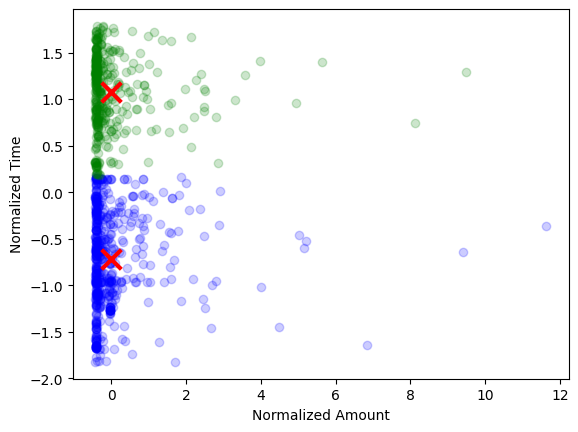

In [10]:
colors = ['b', 'g']
for i in range(2):
    index = df['cluster'] == i
    plt.scatter(df.loc[index, 'norm_amount'], df.loc[index, 'norm_time'], c=colors[i], alpha=0.2)
# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

plt.xlabel('Normalized Amount')
plt.ylabel('Normalized Time')
plt.show()

## Make a prediction for 1 row 

In [16]:
sample_row = data.sample(n=1).index
sample_features = df.loc[sample_row, ['norm_amount', 'norm_time']]
print(f"For the row with values:\n {sample_features}")
print(f'\nThe clustering predicted {kmeans.predict(sample_features)}')
print(f"The actual value is {data.loc[sample_row, 'Class'].values}")

For the row with values:
      norm_amount  norm_time
648     0.003398   0.653738

The clustering predicted [1]
The actual value is [1]
